# YZV 311E DATA MINING PROJECT
# <strong>Detection Of Sucidal Texts</strong>
## Zehra Demir
## Nurbanu Gök

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

### Reading the data file

In [2]:
df = pd.read_csv("data/Suicide_Detection_50k.csv")

In [3]:
df.head()


,text,class
0,How do you shower? May you tell me how you sho...,non-suicide
1,How do I prevent suicide before it even starts...,suicide
2,Suicidal ThoughtsI haven't gone 1 day without ...,suicide
3,"Ignore, just checkin somethin' Just checking i...",non-suicide
4,i’m a busy man 😂😂😂😂😂😂😂😂 jk all i do is go on r...,non-suicide


In [4]:
df.shape

(50000, 2)

## Data Preprocessing

In [5]:
df.isna().sum()

text     0
class    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

text     object
class    object
dtype: object

### Some work has been done when reducing the data set to be able to fit it in GitHub repository. This is why we do not have any null or duplicate values now. You can find the details in data_reducing.ipynb file.

### We can now proceed with the text preprocessing part.

## Text Preprocessing

### Remove URLs etc.

In [8]:
import re

In [9]:
def clean(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove mentions/handles
    #text = re.sub(r'[^A-Za-z0-9]+', ' ', text) 
    return text
df['text'] = df['text'].apply(clean)

### Lowercasing the text data

In [10]:
df['text'] = df['text'].str.lower()
df.head()

,text,class
0,how do you shower? may you tell me how you sho...,non-suicide
1,how do i prevent suicide before it even starts...,suicide
2,suicidal thoughtsi haven't gone 1 day without ...,suicide
3,"ignore, just checkin somethin' just checking i...",non-suicide
4,i’m a busy man 😂😂😂😂😂😂😂😂 jk all i do is go on r...,non-suicide


#

### Emoji and Emoticon Handling

In [11]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import emoji


#### Converting the emojis

In [13]:


def convert_emojis_to_text(text):
    return emoji.demojize(text)

#df['text'] = df['text'].apply(convert_emojis_to_text)


In [14]:
df.head(5)

,text,class
0,how do you shower? may you tell me how you sho...,non-suicide
1,how do i prevent suicide before it even starts...,suicide
2,suicidal thoughtsi haven't gone 1 day without ...,suicide
3,"ignore, just checkin somethin' just checking i...",non-suicide
4,i’m a busy man 😂😂😂😂😂😂😂😂 jk all i do is go on r...,non-suicide


#### ... or removing the emojis

In [15]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install clean-text

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from cleantext import clean

In [18]:
def clean_emojis(text):

    return clean(text, no_emoji=True)

df['text'] = df['text'].apply(clean_emojis)

In [19]:
df.head()

,text,class
0,how do you shower? may you tell me how you sho...,non-suicide
1,how do i prevent suicide before it even starts...,suicide
2,suicidal thoughtsi haven't gone 1 day without ...,suicide
3,"ignore, just checkin somethin' just checking i...",non-suicide
4,i'm a busy man jk all i do is go on reddit,non-suicide


### Remove Punctuations

In [20]:
import string

In [21]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df["text"] = df["text"].apply(remove_punctuation)

### Remove Stop Words

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kullanıcı\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Example usage:
df['text'] = df['text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kullanıcı\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kullanıcı\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
df.head()

,text,class
0,shower may tell shower step step please im wei...,non-suicide
1,prevent suicide even startsi headed towards co...,suicide
2,suicidal thoughtsi havent gone 1 day without t...,suicide
3,ignore checkin somethin checking alt enough ka...,non-suicide
4,im busy man jk go reddit,non-suicide


### Stemming

In [25]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer

stemmer1=PorterStemmer()
stemmer2=SnowballStemmer("english")
stemmer3=LancasterStemmer()

In [26]:


def stem_words(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer1.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Example usage:
stem_words("I love to eating cookie")

'i love to eat cooki'

In [27]:
df.head()

,text,class
0,shower may tell shower step step please im wei...,non-suicide
1,prevent suicide even startsi headed towards co...,suicide
2,suicidal thoughtsi havent gone 1 day without t...,suicide
3,ignore checkin somethin checking alt enough ka...,non-suicide
4,im busy man jk go reddit,non-suicide


### Lemmatization

In [28]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
#init the wordnet lemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kullanıcı\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kullanıcı\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
wnl = WordNetLemmatizer()

def lemmatize_words(text):
    words = word_tokenize(text)
    lemmatized_words = [wnl.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Example usage:
lemmatize_words("programmed programmers programming")

df["text"] = df["text"].apply(lemmatize_words)

### Importing TF-IDF Libraries

select vectorizer??

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Splitting Data

In [32]:

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42)

## TF - IDF

In [33]:
# Convert text data to numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf.shape)

(40000, 67068)


## Random Forest

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_tfidf = rf.predict(X_test_tfidf)

In [ ]:
# Check accuracy
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Accuracy (TF-IDF): {accuracy_tfidf}')

# Display confusion matrix and classification report
#conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
class_report_tfidf = classification_report(y_test, y_pred_tfidf)

print('Confusion Matrix (TF-IDF):')
#print(conf_matrix_tfidf)
print('\nClassification Report (TF-IDF):')
print(class_report_tfidf)

Accuracy (TF-IDF): 0.891
Confusion Matrix (TF-IDF):

Classification Report (TF-IDF):
              precision    recall  f1-score   support

 non-suicide       0.89      0.89      0.89      5044
     suicide       0.89      0.89      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<function matplotlib.pyplot.show(close=None, block=None)>

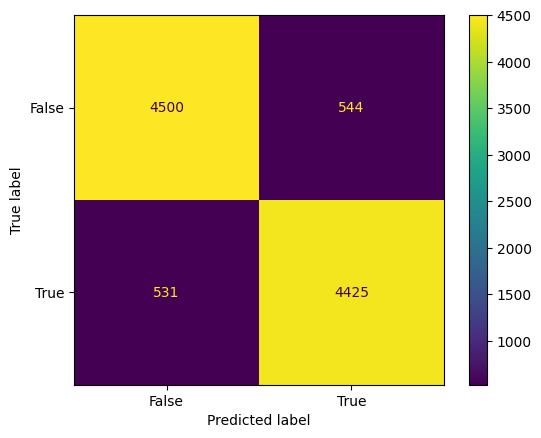

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_tfidf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
rf_v1 = RandomForestClassifier(random_state=42)

In [ ]:
rf_v1.fit(X_train_tfidf, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_v1 = rf_v1.predict(X_test_tfidf)
# evaluate predictions
accuracy_v1 = accuracy_score(y_test, y_pred_v1)
print(f'Accuracy (TF-IDF): {accuracy_v1}')

# Display confusion matrix and classification report
#conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
class_report_v1 = classification_report(y_test, y_pred_v1)

print('Confusion Matrix (TF-IDF):')
#print(conf_matrix_tfidf)
print('\nClassification Report (TF-IDF):')
print(class_report_v1)



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


Accuracy (TF-IDF): 0.8909
Confusion Matrix (TF-IDF):

Classification Report (TF-IDF):
              precision    recall  f1-score   support

 non-suicide       0.89      0.90      0.89      5044
     suicide       0.89      0.89      0.89      4956

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
y_pred = best_rf_model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    }


NameError: name 'randint' is not defined

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)


In [ ]:
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings to sample
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Number of jobs to run in parallel
    verbose=2
)


In [ ]:
random_search.fit(X_train_tfidf, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
print("Best Parameters:", random_search.best_params_)


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8727
Classification Report:
               precision    recall  f1-score   support

 non-suicide       0.88      0.87      0.87      5044
     suicide       0.87      0.88      0.87      4956

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Gaussian Naïve Bayes 

In [ ]:
#X_train_dense = X_train_tfidf.toarray()
#X_test_dense = X_test_tfidf.toarray()

MemoryError: Unable to allocate 20.0 GiB for an array with shape (40000, 67068) and data type float64

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred_tfidf = nb.predict(X_test_tfidf)

In [ ]:
# Check accuracy
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Accuracy (TF-IDF): {accuracy_tfidf}')

# Display confusion matrix and classification report
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
class_report_tfidf = classification_report(y_test, y_pred_tfidf)

print('Confusion Matrix (TF-IDF):')
print(conf_matrix_tfidf)
print('\nClassification Report (TF-IDF):')
print(class_report_tfidf)

Accuracy (TF-IDF): 0.8588


TypeError: 'numpy.ndarray' object is not callable